<a href="https://colab.research.google.com/github/gyubinc/Hwaseong_Population_Forecasting/blob/main/AR_validation_%EC%B4%88%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,702 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120893 files and dire

In [1]:
!git clone https://github.com/gyubinc/Hwaseong_Population_Forecasting.git

Cloning into 'Hwaseong_Population_Forecasting'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 268 (delta 153), reused 207 (delta 98), pack-reused 0
Receiving objects: 100% (268/268), 1.25 MiB | 6.09 MiB/s, done.
Resolving deltas: 100% (153/153), done.


In [ ]:
!pwd

/content


In [2]:
%cd Hwaseong_Population_Forecasting

/content/Hwaseong_Population_Forecasting


## Colab 클론 호환 체크

---



In [3]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=527afa66372cf8169acd17b3c8f5ce423539d3d810c1671ac0faeedc3e1d0ca9
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [5]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [10]:
!python main.py

Traceback (most recent call last):
  File "/content/Hwaseong_Population_Forecasting/main.py", line 2, in <module>
    from code.train import LSTM_train, Transformer_train, uni_Transformer
  File "/content/Hwaseong_Population_Forecasting/code/train.py", line 10, in <module>
    from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerModel
ModuleNotFoundError: No module named 'transformers'


### AR multi-step 예측 평가 프로토타입

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [9]:
# arguments.py에서 # 모든 path를 '/content/Hwaseong_data.xlsx'로 바꿔줘야 함
import pandas as pd
import argparse
from Hwaseong_Population_Forecasting.code.arguments import get_args

args = get_args()
data = pd.read_excel(args.train_path)
data

,월별,총인구,내국인,외국인,등록외국인,외국국적동포,지가지수,지가변동률_수도권,지가변동률_화성시,매매가격지수_아파트_수도권,...,지가변동률 _농촌생활권,지가변동률_도시생활이용권,지가변동률 _도시생활권,0세_19세 총인구,20세_39세 총인구,40세_59세 총인구,60세 이상_총인구,총인구_농촌생활권,총인구_도시생활이용권,총인구_도시생활권
0,2014-03-01,719,744,-25,-66,41,0.093,0.073,0.122,0.083,...,0.0000,0.000000,0.000000,338,214,110,81,216,343,556
1,2014-04-01,295,-29,324,380,-56,-0.031,-0.037,-0.040,-0.322,...,0.0000,0.000000,0.000000,52,-120,-3,40,366,266,-102
2,2014-05-01,112,-45,157,166,-9,0.187,-0.027,0.244,-0.059,...,0.0000,0.000000,0.000000,-38,98,-124,20,132,186,269
3,2014-06-01,-245,-70,-175,-173,-2,-0.049,-0.019,-0.064,0.014,...,0.0000,0.000000,0.000000,-39,30,-28,-32,234,176,-162
4,2014-07-01,-220,-83,-137,-144,7,-0.110,0.020,-0.143,0.029,...,0.0000,0.000000,0.000000,166,-1,-204,-43,255,298,-226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022-12-01,-836,-835,-1,9,-10,-0.094,-0.029,-0.093,-1.111,...,-0.0254,-0.106000,-0.097088,-238,-423,-103,-74,1260,1349,-116
106,2023-01-01,297,830,-533,-509,-24,-0.011,0.003,-0.013,1.174,...,-0.0260,-0.018333,-0.022588,495,-79,437,-26,433,441,2565
107,2023-02-01,977,679,298,281,17,-0.002,0.021,0.000,0.721,...,-0.0110,0.014000,0.004500,125,196,353,11,188,241,1124
108,2023-03-01,-972,-999,27,-4,31,0.004,0.034,0.003,0.686,...,-0.0044,-0.005333,0.002588,-644,650,-1023,16,372,472,-1414


In [16]:
y_total = data.set_index('월별')[['총인구']]
y_total

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,총인구
월별,
2014-03-01,719
2014-04-01,295
2014-05-01,112
2014-06-01,-245
2014-07-01,-220
...,...
2022-12-01,-836
2023-01-01,297
2023-02-01,977


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='월별'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


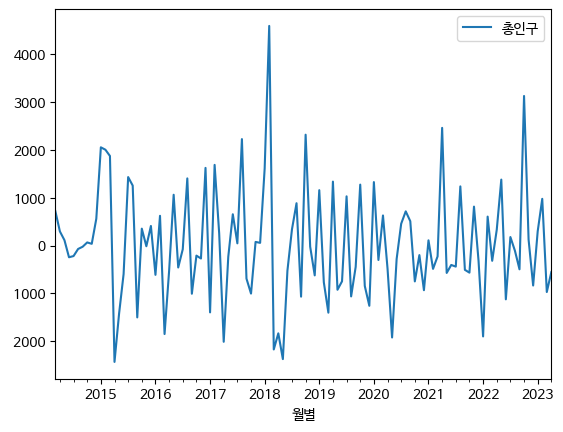

In [17]:
y_total.plot()

In [20]:
y_train = y_total[:-12]
y_valid = y_total[-12:]
print(y_train, y_valid)

             총인구
월별              
2014-03-01   719
2014-04-01   295
2014-05-01   112
2014-06-01  -245
2014-07-01  -220
...          ...
2021-12-01  -318
2022-01-01 -1901
2022-02-01   605
2022-03-01  -319
2022-04-01   329

[98 rows x 1 columns]              총인구
월별              
2022-05-01  1379
2022-06-01 -1125
2022-07-01   178
2022-08-01  -110
2022-09-01  -497
2022-10-01  3128
2022-11-01   123
2022-12-01  -836
2023-01-01   297
2023-02-01   977
2023-03-01  -972
2023-04-01  -554


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
import warnings
import statsmodels
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("default")
model = statsmodels.tsa.arima.model.ARIMA(y_valid.values, order = (4,0,0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(4, 0, 0)   Log Likelihood                 -99.773
Date:                Mon, 04 Sep 2023   AIC                            211.545
Time:                        12:28:48   BIC                            214.455
Sample:                             0   HQIC                           210.468
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        241.8206    210.901      1.147      0.252    -171.538     655.179
ar.L1         -0.3337      0.705     -0.473      0.636      -1.716       1.048
ar.L2         -0.6134      0.774     -0.793      0.428      -2.130       0.903
ar.L3         -0.1109      0.696     -0.159      0.873      -1.475       1.253
ar.L4         -0.2660      0.416     -0.639      0.523      -1.082       0.550
sigma2      9.773e+05   1.12e+06      0.871      0.384   -1.22e+06    3.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.70   Prob(JB):                         0.62
Heteroskedasticity (H):               1.10   Skew:                             0.64
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
prediction = model_fit.get_forecast(12)
prediction.predicted_mean

array([1155.64001995,  364.12115978,   51.64560518,  340.57508636,
         68.88835976,  227.51576446,  392.29176335,  193.30186967,
        213.30127272,  268.21024145,  215.86672395,  250.36292934])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


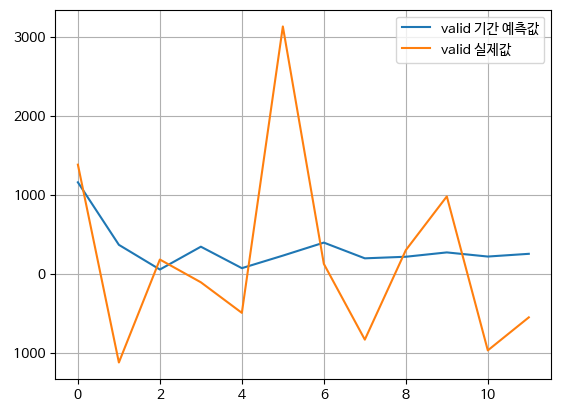

In [35]:
plt.plot(prediction.predicted_mean, label='valid 기간 예측값')
plt.plot(y_valid.reset_index()['총인구'], label='valid 실제값')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import numpy as np
rmse = np.sqrt(((prediction.predicted_mean - y_valid.reset_index()['총인구']) ** 2).mean())
mae = np.abs(prediction.predicted_mean - y_valid.reset_index()['총인구']).mean()

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 819.9245823711698
RMSE: 1115.0033316292127
